In [33]:
import numpy as np

import tensorflow as tf
import keras
from PIL import Image
from matplotlib import image

import time
from IPython.display import clear_output
import os

In [31]:
img_path = "./Train/"
img_names = os.listdir(img_path)

In [27]:
for image in img_names:
    if "jpeg" in image and "." not in image:
        newname = image.replace("jpeg",".jpeg")
        os.rename(img_path+image,img_path+newname)

In [39]:
os.remove(img_path+"image_2700.jpg")

In [54]:
data = pd.read_csv("train.csv")
data = data.drop(data.index[data['Id'] == "image_2700.jpg"])
data.to_csv("train.csv")

In [10]:
images = list()
types = list()
webp = list()
gif = list()

for img in img_names:
    if img == "image_2700.jpg":
        continue
    image = Image.open("../Desafio2/Train/" + img).convert("RGB")
    t = image.format
    types.append(t)
    
    print(image.size)
    print(np.asarray(image).shape)
    print(image.format)
    
    if t == "WEBP":
        webp.append(image)
    if t == "GIF":
        gif.append(image)
    if 3000<(image.size[0]):
        i = image
    images.append(np.asarray(image.resize((224,224))))
    clear_output(wait=True)

(224, 224)
(224, 224, 3)
None


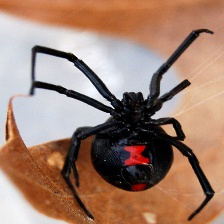

Viuda negra: 88


In [97]:
weas_malas = dict()
for i in animales.keys():
    for j in range(len(animales[i])):
        tf.keras.preprocessing.image.array_to_img(animales[i][j]).show()
        print(f"{i}: {j}")
        if input()=="n":
            if not i in weas_malas.keys():
                weas_malas[i] = [j]
            else:
                weas_malas[i].append(j)
        clear_output(wait=True)

In [ ]:
{'Camaleon': [19, 78],
 'Cocodrilo': [38],
 'Conejo': [22, 73, 77, 95],
 'Elefante': [51],
 'Iguana': [58, 69, 70, 71, 72, 106],
 'Lagarto': [14, 16, 28, 29, 31, 36, 39, 41, 43, 44, 49, 50, 52, 57, 59, 60, 61, 62, 65, 67, 68, 69, 70, 72, 77, 81, 107, 108, 117],
 'Leon': [99],
 'Lobo': [22, 56],
 'Oso': [26],
 'Perro': [11, 13, 16, 41, 61, 110],
 'Rana': [30, 31, 34, 40, 45, 48, 50, 53, 58, 59, 62, 68, 69, 77, 103, 114, 118],
 'Salamandra': [31, 70],
 'Sapo': [3, 4, 14, 19, 20, 25, 29, 37, 38, 39, 40, 54, 70, 79, 87, 92, 95, 96, 101, 103, 113, 114, 115, 120, 122, 135, 137],
 'Serpiente': [12, 70],
 'Tigre': [25],
 'Tortuga': [75, 85, 86, 91, 95, 102, 105, 109, 182]}

In [62]:
for col in df.columns:
    for i in animales[col]:
        j = tf.keras.preprocessing.image.array_to_img(i)
        j.show()
        clear_output(wait = True)
        time.sleep(.1)

KeyboardInterrupt: 

In [207]:
for i in train_labels["Expected"].unique():
    train_labels[i] = train_labels["Expected"].apply(lambda x : int(x == i))
Y = train_labels.drop(['Unnamed: 0', 'Id', 'Expected'],axis=1)

In [20]:
file = open("data224.obj", "wb")
data = pickle.dump(images, file)
file.close()

In [ ]:
file = open("data224.obj", "rb")
images = pickle.load(file)
file.close()

In [219]:
model = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape = (224, 224, 3)),
    keras.layers.RandomRotation(0.4),
    keras.layers.RandomZoom(0.1),
    keras.layers.GaussianNoise(0.1),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, 4, strides = (2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 4, strides = (2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 4, strides = (2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation ='softmax')
])

In [220]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_6 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_6 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_6 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 gaussian_noise_4 (GaussianN  (None, 224, 224, 3)      0         
 oise)                                                           
                                                                 
 rescaling_11 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 32)    

In [221]:
history = model.fit(images, y_ohe, epochs=epoch, validation_split=0.2, callbacks=callback)

Epoch 1/50
88/88 [==============================] - 18s 197ms/step - loss: 1.3697 - accuracy: 0.3839 - val_loss: 2.6431 - val_accuracy: 0.0000e+00
Epoch 2/50
88/88 [==============================] - 16s 187ms/step - loss: 1.2997 - accuracy: 0.4496 - val_loss: 3.1350 - val_accuracy: 0.0000e+00
Epoch 3/50
88/88 [==============================] - 16s 186ms/step - loss: 1.2495 - accuracy: 0.4964 - val_loss: 3.1748 - val_accuracy: 0.0113
Epoch 4/50
88/88 [==============================] - 16s 186ms/step - loss: 1.1921 - accuracy: 0.5163 - val_loss: 3.4748 - val_accuracy: 0.0227
Epoch 5/50
88/88 [==============================] - 16s 186ms/step - loss: 1.1685 - accuracy: 0.5121 - val_loss: 3.6191 - val_accuracy: 0.0411
Epoch 6/50
88/88 [==============================] - 16s 186ms/step - loss: 1.1325 - accuracy: 0.5394 - val_loss: 2.9609 - val_accuracy: 0.0312
Epoch 7/50
88/88 [==============================] - 16s 186ms/step - loss: 1.1155 - accuracy: 0.5373 - val_loss: 3.7771 - val_accuracy

In [75]:
labels_format = dict()
Anfibio = ['Rana', 'Salamandra', 'Sapo']
Artropodo = ['Lombriz', 'Mariposa', 'Saltamontes', 'Tarantula', 'Viuda negra']
Ave = ['Buho', 'Cacique', 'Cisne', 'Cormoran', 'Ganso', 'Paloma', 'Pato', 'Pavo']
Mamifero = ['Caballo', 'Cabra', 'Conejo', 'Elefante', 'Gato', 'Leon', 'Lobo', 'Oso', 'Perro', 'Tigre']
Reptil = ['Camaleon', 'Cocodrilo', 'Iguana', 'Lagarto', 'Serpiente', 'Tortuga']


Anfibio
Artropodo
Ave
Mamifero
Reptil
Rana
Salamandra
Sapo
Lombriz
Mariposa
Saltamontes
Tarantula
Viuda negra
Buho
Cacique
Cisne
Cormoran
Ganso
Paloma
Pato
Pavo
Caballo
Cabra
Conejo
Elefante
Gato
Leon
Lobo
Oso
Perro
Tigre
Camaleon
Cocodrilo
Iguana
Lagarto
Serpiente
Tortuga
